<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.933654,50.011231,73.709750,0.009741,169.664376,169.653913,0.010464
1,0.0,1.0,21.667503,43.052443,27.483823,-0.003413,102.200355,102.199410,0.000945
2,0.0,2.0,95.490728,89.671441,20.401421,-0.000426,215.563164,215.559952,0.003212
3,0.0,3.0,53.439540,69.223894,51.482093,0.006606,184.152134,184.143868,0.008266
4,0.0,4.0,57.982096,22.445286,71.699092,0.008186,162.134661,162.123682,0.010979
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.896345,91.722444,25.676530,-0.004434,211.290886,211.295428,-0.004542
29996,999.0,26.0,71.540093,86.973276,54.604046,-0.000664,223.116751,223.116790,-0.000039
29997,999.0,27.0,84.201863,47.653332,43.013969,0.014552,184.883716,184.870155,0.013560
29998,999.0,28.0,80.010971,87.524586,35.740988,-0.001118,213.275429,213.276475,-0.001047


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.933654,50.011231,73.709750,0.009741,169.664376,169.653913,0.010464
1,0.0,1.0,21.667503,43.052443,27.483823,-0.003413,102.200355,102.199410,0.000945
2,0.0,2.0,95.490728,89.671441,20.401421,-0.000426,215.563164,215.559952,0.003212
3,0.0,3.0,53.439540,69.223894,51.482093,0.006606,184.152134,184.143868,0.008266
4,0.0,4.0,57.982096,22.445286,71.699092,0.008186,162.134661,162.123682,0.010979
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.896345,91.722444,25.676530,-0.004434,211.290886,211.295428,-0.004542
29996,999.0,26.0,71.540093,86.973276,54.604046,-0.000664,223.116751,223.116790,-0.000039
29997,999.0,27.0,84.201863,47.653332,43.013969,0.014552,184.883716,184.870155,0.013560
29998,999.0,28.0,80.010971,87.524586,35.740988,-0.001118,213.275429,213.276475,-0.001047


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.933654,50.011231,73.709750,0.009741,169.664376,169.653913,0.010464
1,0.0,1.0,21.667503,43.052443,27.483823,-0.003413,102.200355,102.199410,0.000945
2,0.0,2.0,95.490728,89.671441,20.401421,-0.000426,215.563164,215.559952,0.003212
3,0.0,3.0,53.439540,69.223894,51.482093,0.006606,184.152134,184.143868,0.008266
4,0.0,4.0,57.982096,22.445286,71.699092,0.008186,162.134661,162.123682,0.010979
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.896345,91.722444,25.676530,-0.004434,211.290886,211.295428,-0.004542
29996,999.0,26.0,71.540093,86.973276,54.604046,-0.000664,223.116751,223.116790,-0.000039
29997,999.0,27.0,84.201863,47.653332,43.013969,0.014552,184.883716,184.870155,0.013560
29998,999.0,28.0,80.010971,87.524586,35.740988,-0.001118,213.275429,213.276475,-0.001047


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.933654  50.011231  73.709750  ...  169.664376  169.653913  0.010464
      1.0    21.667503  43.052443  27.483823  ...  102.200355  102.199410  0.000945
      2.0    95.490728  89.671441  20.401421  ...  215.563164  215.559952  0.003212
      3.0    53.439540  69.223894  51.482093  ...  184.152134  184.143868  0.008266
      4.0    57.982096  22.445286  71.699092  ...  162.134661  162.123682  0.010979
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   83.896345  91.722444  25.676530  ...  211.290886  211.295428 -0.004542
      26.0   71.540093  86.973276  54.604046  ...  223.116751  223.116790 -0.000039
      27.0   84.201863  47.653332  43.013969  ...  184.883716  184.870155  0.013560
      28.0   80.010971  87.524586  35.740988  ...  213.275429  213.276475 -0.001047
      29.0   26.696981  47.162400  30.505677  ...  114.353941  114.360638 -0.006697

[30000 rows x 7 columns]

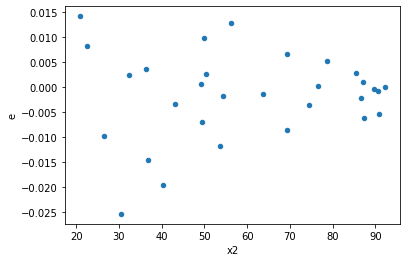

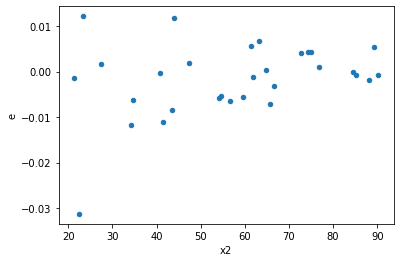

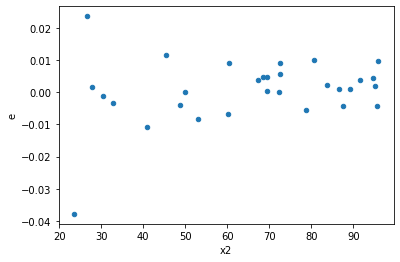

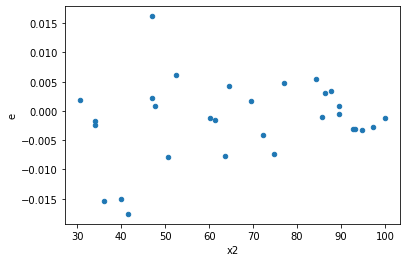

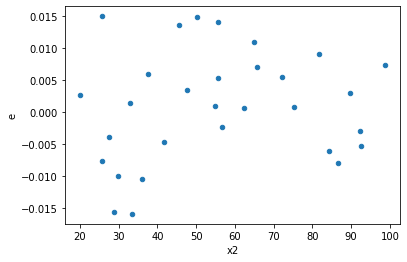

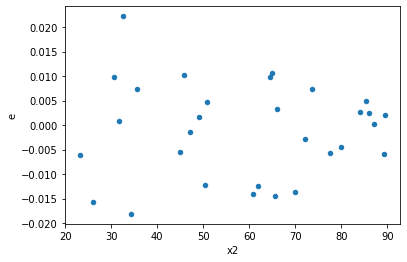

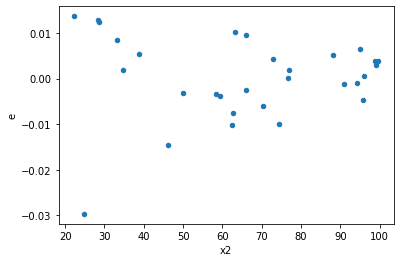

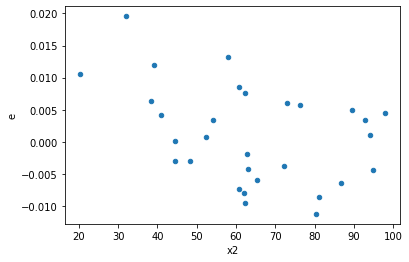

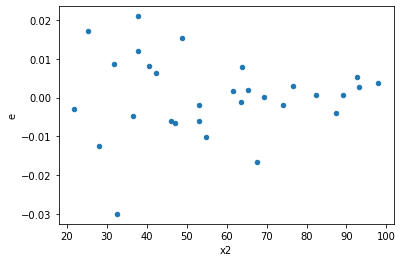

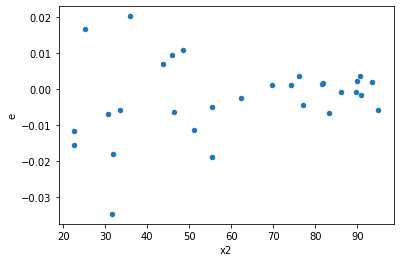

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
228.0,9.0,9.0,0.00019068268585224762,0.0001014126299085779,2.3835335731530953e-05,1.2676578738572238e-05,1.8802656634005592,0.3607389913886916,0.8196305043056542,Reject001=1 : Homoscedasticity
880.0,9.0,9.0,0.0004542379474014019,0.00038158133053844555,5.677974342517524e-05,4.7697666317305694e-05,1.1904092549822376,0.7993861351278686,0.6003069324360657,Reject001=1 : Homoscedasticity
998.0,9.0,9.0,0.00022893840356188265,0.0001998854003989985,2.861730044523533e-05,2.4985675049874813e-05,1.1453483001004094,0.8431045777663639,0.578447711116818,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.00011591410591813474,0.0015053185065520387,1.4489263239766842e-05,0.00018816481331900483,0.0770030431524012,0.000749869256305329,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,5.520249959593992e-05,0.0011076296992855172,6.90031244949249e-06,0.00013845371241068966,0.04983840685343541,0.00012762237062912614,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,0.00021780652748725195,0.0014497869956295482,2.7225815935906494e-05,0.00018122337445369353,0.15023346749821875,0.00939972530440299,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,1.2614319611282791e-05,0.0008634739182636029,1.5767899514103489e-06,0.00010793423978295036,0.014608802124156191,6.553412987025704e-07,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,0.000312037427159504,0.000571457324718702,3.9004678394938e-05,7.143216558983774e-05,0.5460380218472192,0.3808236852528781,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.000354312562327338,0.0011495424510648384,4.428907029091725e-05,0.0001436928063831048,0.30822051156017155,0.09443683679103804,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.00014158547109507317,0.0016221487169007715,1.7698183886884146e-05,0.00020276858961259644,0.08728266996726546,0.0012295380009289937,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,0.00030942085128598195,0.0004472619362452779,3.8677606410747744e-05,5.5907742030659735e-05,0.691811277041684,0.5918976359093184,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.00034805432608661516,0.0021175915791656107,4.3506790760826895e-05,0.00026469894739570134,0.16436329342779032,0.012892701219356636,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    613
Reject001=1 : Homoscedasticity      387
Name: Result_test, dtype: int64